<a href="https://colab.research.google.com/github/ProsperChuks/Population-Estimate-and-Projection/blob/main/forecasts/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [ ]:
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [6]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [42]:
import pickle
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
import pandas as pd

## Loading Models

In [17]:
cbr_forecast = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/models/cbr_model.pkl', 'rb'))
cdr_forecast = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/models/cdr_model.pkl', 'rb'))

## Forecasting Crude Birth Rate(Per 1000 Persons) up to Year 2060

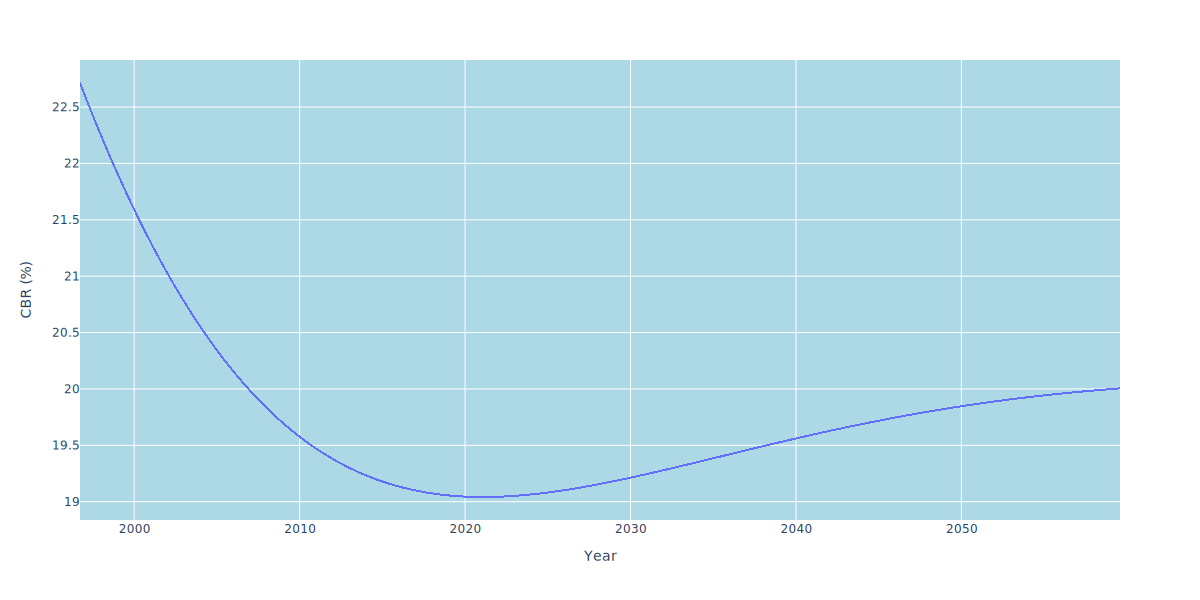

In [70]:
predict = cbr_forecast.predict(start=2020, end=5300)
predict = pd.DataFrame(predict, index=predict.index)
predict
fig = px.line(predict, predict.index, predict.predicted_mean,
        labels={'x':'Year', 'predicted_mean': 'CBR (%)'})

fig.update_layout(plot_bgcolor='lightblue')
fig.show('svg', height=600, width=1200)

## Forecasting Crude Death Rate(Per 1000 Persons) up to Year 2060

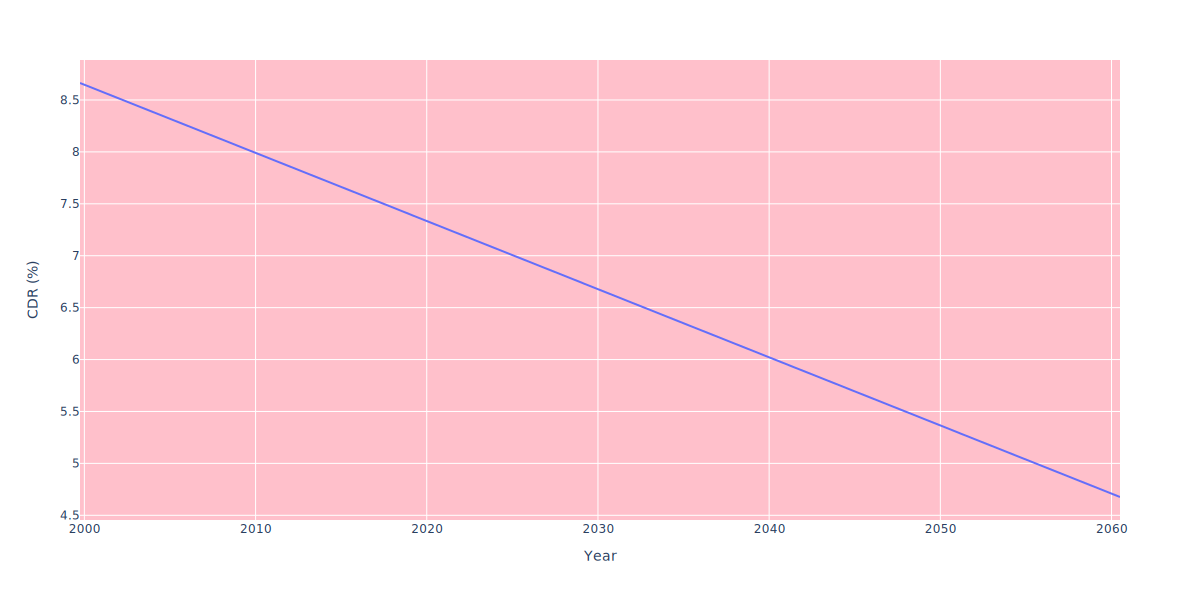

In [69]:
predict = cdr_forecast.forecast(730)

fig = px.line(predict, predict.index, 0, 
        labels={'x':'Year', '0': 'CDR (%)'})

fig.update_layout(plot_bgcolor='pink')
fig.show('svg', height=600, width=1200)